In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Column-wise correlation

In [2]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_notnull = df[(df[r].notnull())&(df[c].notnull())]._get_numeric_data()
            pvalues[r][c] = round(pearsonr(df_notnull[r], df_notnull[c])[1], 4)
    return pvalues

In [3]:
df_tract = pd.read_csv('../data/clean/tract_level_all_panel.csv')

In [4]:
df_tract.rename(columns={'evictions':'# of evictions','amount':'avg judge. amount'},inplace=True)
df_tract['Permit_count_prev_year'] = df_tract['Permit_count_prev_year'].fillna(0)
df_tract['Permit_count_this_year'] = df_tract['Permit_count_this_year'].fillna(0)

In [33]:
df_tract.head()

,Unnamed: 0,tract,year,judgements,# of evictions,avg judge. amount,evicted_white,evicted_black,evicted_hisp,evicted_asian,...,perc_poverty_line,unemployment_rate,perc_insured,median_income,evictions_pc,evictions_pu,perc_rental,Permit_count_prev_year,Permit_count_this_year,mobility_rate
0,1,48113000100,2017,31,31,1812.308421,26.076330,0.664677,3.322692,0.337228,...,NaN,4.4,94.8,97679,0.007846,0.047988,0.352428,353.0,337.0,0.175775
1,2,48113000100,2018,15,19,2028.928333,13.616015,2.497810,1.587126,0.861060,...,NaN,3.8,94.7,103214,0.004656,0.026648,0.376850,337.0,272.0,0.175775
2,3,48113000100,2019,13,17,1818.310000,14.081011,0.712082,1.777414,0.028224,...,1.2,3.7,96.9,112368,0.004141,0.025148,0.360341,272.0,118.0,0.175775
3,4,48113000100,2020,14,14,1199.708182,9.647780,2.185291,1.625310,0.146603,...,1.2,2.4,97.6,114306,0.003556,0.017722,0.427258,118.0,20.0,0.175775
4,5,48113000201,2017,2,2,1964.755000,1.938821,0.012981,0.006560,0.008454,...,NaN,1.7,88.4,89605,0.000688,0.005587,0.252468,270.0,216.0,0.046468


In [48]:
df_tract.columns

Index(['Unnamed: 0', 'tract', 'year', 'judgements', '# of evictions',
       'avg judge. amount', 'evicted_white', 'evicted_black', 'evicted_hisp',
       'evicted_asian', 'evicted_other', 'total_pop', 'white_pop', 'black_pop',
       'native_pop', 'asian_pop', 'pacific_pop', 'other_pop', 'two_race_pop',
       'tot_housing', 'rental_vacancy', 'median_rent', 'owner_occ',
       'renter_occ', 'perc_rent_gt_35', 'single_fathers', 'single_mothers',
       'perc_snap_benefits', 'perc_poverty_line', 'unemployment_rate',
       'perc_insured', 'median_income', 'evictions_pc', 'evictions_pu',
       'perc_rental', 'Permit_count_prev_year', 'Permit_count_this_year',
       'mobility_rate'],
      dtype='object')

In [5]:
df_tract = df_tract[['evictions_pc','evictions_pu','Unnamed: 0', 'tract', 'year', 'judgements', '# of evictions',
       'avg judge. amount', 'evicted_white', 'evicted_black', 'evicted_hisp',
       'evicted_asian', 'evicted_other', 'total_pop', 'white_pop', 'black_pop',
       'native_pop', 'asian_pop', 'pacific_pop', 'other_pop', 'two_race_pop',
       'tot_housing', 'rental_vacancy', 'median_rent', 'owner_occ',
       'renter_occ', 'perc_rent_gt_35', 'single_fathers', 'single_mothers',
       'perc_snap_benefits', 'perc_poverty_line', 'unemployment_rate',
       'perc_insured', 'median_income',  
       'perc_rental', 'Permit_count_prev_year', 'Permit_count_this_year',
       'mobility_rate']]

In [6]:
drop_col = ['tract','year','judgements','Unnamed: 0','perc_poverty_line', '# of evictions',
           'evicted_white', 'evicted_black', 'evicted_hisp', 'evicted_asian', 'evicted_other','evictions_pu']

In [122]:
### choose the corresponding df_plot for each year
# df_plot = df_tract.drop(columns=drop_col).drop(columns=['mobility_rate']).copy()
# df_plot = df_tract[df_tract.year==2017].reset_index().drop(columns=drop_col + ['index'])
# df_plot = df_tract[df_tract.year==2018].reset_index().drop(columns=drop_col + ['mobility_rate','index'])
# df_plot = df_tract[df_tract.year==2019].reset_index().drop(columns=drop_col + ['mobility_rate','index'])
df_plot = df_tract[df_tract.year==2020].reset_index().drop(columns=drop_col + ['mobility_rate','index'])

In [123]:
## get the correlation and p_value matrix
import numpy as np
p_df = calculate_pvalues(df_plot)
corr_df = df_plot.corr()

# remove the insignificant corr
corr_sig_df = corr_df.copy()
for i in range(corr_sig_df.shape[0]):
    for j in range(corr_sig_df.shape[1]):
        if p_df.iloc[i,j] > 0.10:
            corr_sig_df.iloc[i,j] = np.nan

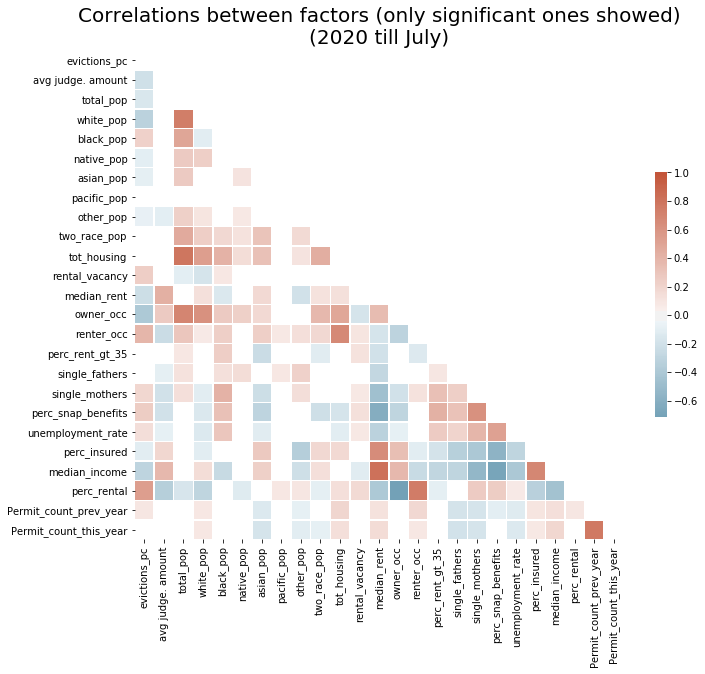

In [124]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# use corr_sig_df to plot significant correlations or use corr_df to plot all correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_sig_df, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr_map = sns.heatmap(corr_sig_df, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_map.set_title('Correlations between factors (only significant ones showed)\n(2020 till July)',size=20)
corr_map.get_figure().savefig("../figures/corr_heatmap_20201020_2020.png",dpi = 500, bbox_inches = 'tight')

## 2. School mobility look up

In [7]:
## subset to year of 2017 because we only have mobility data at 2016-2017
df_2017 = df_tract[df_tract.year==2017].reset_index().drop(columns= ['index','Unnamed: 0','perc_poverty_line',
                                                                    'evicted_black', 'evicted_hisp', 'evicted_asian', 'evicted_other'])

In [8]:
df_2017.mobility_rate.notnull().sum()

277

In [32]:
df_ols = df_2017[['mobility_rate','Permit_count_prev_year','black_pop', 'median_rent','evictions_pc']].dropna()

In [36]:
## normalize the X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = ['mobility_rate','Permit_count_prev_year','black_pop', 'median_rent']

df_ols[cols] = scaler.fit_transform(df_ols[cols])
df_ols['evictions_pc'] = df_ols['evictions_pc'] * 100

In [38]:
import statsmodels.api as sm
mod = sm.OLS(df_ols.evictions_pc,
             df_ols[['mobility_rate','Permit_count_prev_year','black_pop',
                                                      'median_rent']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           evictions_pc   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              58.24
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                    1.82e-35
Time:                        11:56:02   Log-Likelihood:                         -1893.4
No. Observations:                 276   AIC:                                      3795.
Df Residuals:                     272   BIC:                                      3809.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mobility_rate            186.3856     47.856      3.895      0.000      92.171     280.600
Permit_count_prev_year   265.3752    120.111      2.209      0.028      28.911     501.840
black_pop                534.5080     68.607      7.791      0.000     399.440     669.576
median_rent               -8.3675     95.200     -0.088      0.930    -195.790     179.055
==============================================================================
Omnibus:                      146.249   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              835.150
Skew:                           2.149   Prob(JB):                    4.46e-182
Kurtosis:                      10.359   Cond. No.                         5.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# ### unnormalized results

# import statsmodels.api as sm
# mod = sm.OLS(df_ols.evictions_pc,
#              df_ols[['mobility_rate','Permit_count_prev_year','black_pop',
#                                                       'median_rent']])
# res = mod.fit()
# res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           evictions_pc   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              60.20
Date:                Tue, 20 Oct 2020   Prob (F-statistic):                    2.29e-36
Time:                        13:17:56   Log-Likelihood:                          650.81
No. Observations:                 276   AIC:                                     -1294.
Df Residuals:                     272   BIC:                                     -1279.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mobility_rate              0.0461      0.013      3.652      0.000       0.021       0.071
Permit_count_prev_year  1.899e-05   1.07e-05      1.775      0.077   -2.07e-06    4.01e-05
black_pop               7.276e-06   1.01e-06      7.179      0.000    5.28e-06    9.27e-06
median_rent            -3.886e-08   2.92e-06     -0.013      0.989   -5.79e-06    5.72e-06
==============================================================================
Omnibus:                      152.812   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              903.402
Skew:                           2.257   Prob(JB):                    6.74e-197
Kurtosis:                      10.628   Cond. No.                     1.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""